In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Import necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
np.corrcoef(df["Pregnancies"],df["Outcome"])

array([[1.        , 0.22189815],
       [0.22189815, 1.        ]])

In [63]:
np.corrcoef(df["Glucose"],df["Outcome"])

array([[1.       , 0.4665814],
       [0.4665814, 1.       ]])

In [42]:
np.corrcoef(df["BloodPressure"],df["Outcome"])

array([[1.        , 0.06506836],
       [0.06506836, 1.        ]])

In [43]:
np.corrcoef(df["SkinThickness"],df["Outcome"])

array([[1.        , 0.07475223],
       [0.07475223, 1.        ]])

In [44]:
np.corrcoef(df["Insulin"],df["Outcome"])

array([[1.        , 0.13054795],
       [0.13054795, 1.        ]])

In [45]:
np.corrcoef(df["BMI"],df["Outcome"])

array([[1.        , 0.29269466],
       [0.29269466, 1.        ]])

In [46]:
np.corrcoef(df["DiabetesPedigreeFunction"],df["Outcome"])

array([[1.        , 0.17384407],
       [0.17384407, 1.        ]])

In [24]:
np.corrcoef(df["Age"],df["Outcome"])

array([[1.        , 0.23835598],
       [0.23835598, 1.        ]])

In [77]:
num_features = ["Pregnancies","DiabetesPedigreeFunction","BloodPressure","Glucose","Insulin","BMI","Age"]
df_new = df[num_features]

In [78]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(df_new, df["Outcome"], 
                                                    test_size = 0.30, 
                                                    random_state = 101)

In [79]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [80]:
model.fit(X_Train,Y_Train)

LogisticRegression(random_state=0, solver='liblinear')

In [81]:
#based on the prediction print the Classification Report
test_prob = model.predict_proba(X_Test)[:, 1]
test_pred = model.predict(X_Test)


print(confusion_matrix(Y_Test, test_pred))
print('\nClassification Report')
print(classification_report(Y_Test, test_pred))

[[136  14]
 [ 36  45]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.56      0.64        81

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



# Neural Network Classifier

In [88]:
target_column = ['target'] 
df = df.rename(columns = {"Outcome":"target"})
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
Age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
target,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


In [89]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape); print(X_test.shape)

(614, 8)
(154, 8)


In [90]:
# Use MLP neural networkk classifier with 10 x 10 x 10 layers and 1000 max iterations
mlp = MLPClassifier(hidden_layer_sizes=([8,8,8]),activation='relu', solver='adam', max_iter=2000)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [91]:
#Let's look at the confusion matrix for the training data
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[367  38]
 [ 93 116]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       405
           1       0.75      0.56      0.64       209

    accuracy                           0.79       614
   macro avg       0.78      0.73      0.74       614
weighted avg       0.78      0.79      0.78       614



In [92]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[86  9]
 [29 30]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.77      0.51      0.61        59

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154



In [66]:
#importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
 
# importing machine learning models for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# importing voting classifer
from sklearn.ensemble import VotingClassifier

In [67]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()
model_4 = GradientBoostingClassifier()
model_5 = DecisionTreeClassifier()

 
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3),('gbc',model_4)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

C:\Users\dan35\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dan35\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:17:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
# printing log loss between actual and predicted value
print(classification_report(pred_final, y_test))
print(confusion_matrix(pred_final, y_test))
print('\nAccuracy Score for Ensemble model: ', accuracy_score(pred_final,y_test))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       114
           1       0.51      0.75      0.61        40

    accuracy                           0.75       154
   macro avg       0.70      0.75      0.71       154
weighted avg       0.79      0.75      0.76       154

[[85 29]
 [10 30]]


NameError: name 'accuracy_score' is not defined

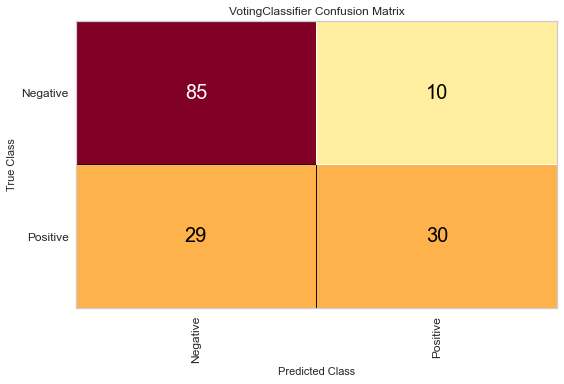

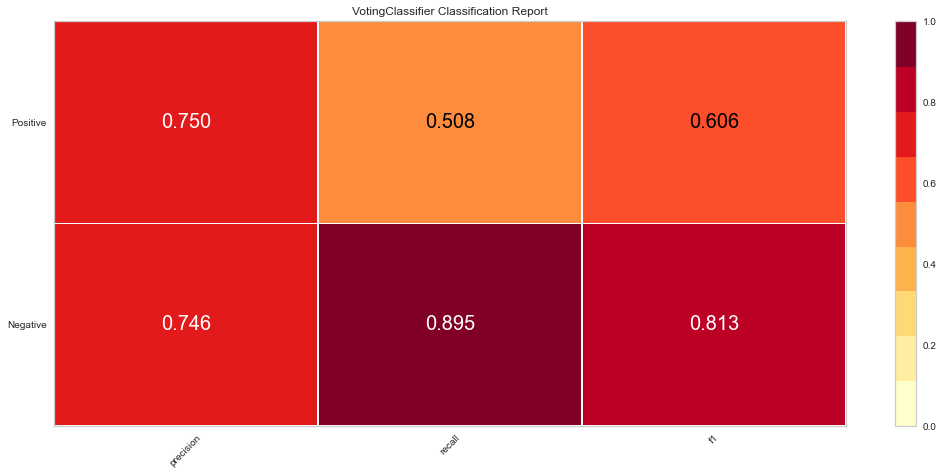

In [86]:
import yellowbrick
#Plot confusion matrix and classificatio report and ROC curves to 
#evaluate the data

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

#The ConfusionMatrix visualizer taxes a model
classes = ['Negative','Positive']
cm = ConfusionMatrix(final_model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(final_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [69]:

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
  
seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 1000
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
  
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print("accuracy :")
print(results.mean())

C:\Users\dan35\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dan35\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dan35\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dan35\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

accuracy :
0.760569105691057
